<a href="https://colab.research.google.com/github/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/ProjetoICD_ExploracaoInicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TÍTULO: "ENEM NA PARAÍBA DE 1998 A 2019"
Autora: Maria Marcolina Lima Cardoso

Arquivo de explorações gerais, sem objetivo de gerar conclusões, apenas para gerar gráficos e análises exploratórias.

Alguas relações analisadas aqui:
Avaliar a relação dos fatores abaixo com o desempenho no Enem:
- tipo de escola (privada, particular)
- tipo de dependência admnistrativa (Federal, Estadual, Municipal, Privada)
- cor/raça
- tipo de localização (Rural, Urbana)
- escolaridade dos pais
- tipo de ocupação dos pais
- renda familiar
- numero de pessoas na casa
- acesso a celular, computador e internet

#**EXPLORAÇÕES INICIAIS**


###**Pacotes Utilizados**

In [2]:
#@title
!pip install plotly==5.1.0
!pip install geopandas

     |████████████████████████████████| 20.6MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 1.0MB 13.6MB/s 
     |████████████████████████████████| 6.6MB 45.7MB/s 
     |████████████████████████████████| 15.4MB 116kB/s 


In [3]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile
import geopandas
import folium

import warnings
warnings.filterwarnings('ignore')

###**Banco de Dados Selecionado**

In [4]:
#@title
#dfEnem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DadosEnem/ENEM_PB_1998_2019.csv',sep=',')
dfEnem = pd.read_csv('https://github.com/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')
escolas_PB = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_ICD_UFPB_EnemPB/main/DADOS/ENEM_2019_POR_ESCOLA_PB.csv',sep=',')
dfEnem.rename(columns={"N_INSC": "NU_INSCRICAO"}, inplace=True)
dfEnem.drop([0], inplace=True)
dfEnem.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,X_NOTA_OBJETIVA,X_NOTA_REDACAO,X_NOTA_CN,X_NOTA_CH,X_NOTA_LC,X_NOTA_MT,X_NOTA_COMP1,X_NOTA_COMP2,X_NOTA_COMP3,X_NOTA_COMP4,X_NOTA_COMP5,NU_INSCRICAO
1,2003.0,2500205.0,AGUIAR,25.0,PB,18.0,F,NaN,24163100.0,2500205.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Fundamental Incompleto,Ensino Médio Completo,4.0,1-2,1.0,1.0,1.0,317.5,425.0,NaN,NaN,NaN,NaN,500.0,500.0,500.0,500.0,500.0,1.0
2,2003.0,2500205.0,AGUIAR,25.0,PB,19.0,F,NaN,24163100.0,2500205.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Sem Estudo,Fundamental Incompleto,4.0,Nenhum,1.0,1.0,1.0,396.8,575.0,NaN,NaN,NaN,NaN,750.0,625.0,500.0,750.0,750.0,1.0
3,2003.0,2500205.0,AGUIAR,25.0,PB,20.0,F,NaN,24163100.0,2500205.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Fundamental Incompleto,Sem Estudo,2.0,1-2,1.0,1.0,1.0,317.5,500.0,NaN,NaN,NaN,NaN,500.0,500.0,500.0,500.0,500.0,1.0
4,2003.0,2500205.0,AGUIAR,25.0,PB,23.0,M,NaN,24163100.0,2500205.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Ensino Médio Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,317.5,425.0,NaN,NaN,NaN,NaN,500.0,375.0,500.0,500.0,500.0,1.0
5,2003.0,2500908.0,ARARA,25.0,PB,18.0,F,NaN,24217421.0,2501500.0,BANANEIRAS,25.0,PB,Estadual,Urbana,1.0,Fundamental Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,269.8,425.0,NaN,NaN,NaN,NaN,500.0,375.0,375.0,500.0,500.0,2.0


In [5]:
#@title
colunas = ['ANO', 'Codmun6', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']
atlasHumano = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_ICD_UFPB_EnemPB/main/DADOS/Atlas2013_municipal_estadual_Brasil.csv',sep=',',encoding=  "ISO-8859-1",usecols=colunas)

In [6]:
#@title
geofile = geopandas.read_file('https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-25-mun.json')
geofile.id = geofile.id.astype('float')
atlasHumano_PB = atlasHumano[atlasHumano.Codmun7.isin(geofile['id'].tolist())]
atlasHumano_PB.rename(columns={"ANO": "NU_ANO", "Codmun7": "CO_MUNICIPIO_ESC"}, inplace=True)

In [7]:
#@title
atlasHumano_PB

,NU_ANO,Codmun6,CO_MUNICIPIO_ESC,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
1241,1991,250010,2500106,ÁGUA BRANCA,0.267,0.121,0.474,0.332
1242,1991,250020,2500205,AGUIAR,0.273,0.104,0.508,0.386
1243,1991,250030,2500304,ALAGOA GRANDE,0.322,0.114,0.625,0.467
1244,1991,250040,2500403,ALAGOA NOVA,0.306,0.136,0.517,0.409
1245,1991,250050,2500502,ALAGOINHA,0.257,0.083,0.536,0.380
...,...,...,...,...,...,...,...,...
12589,2010,251690,2516904,UIRAÚNA,0.636,0.528,0.797,0.612
12590,2010,251700,2517001,UMBUZEIRO,0.584,0.514,0.712,0.545
12591,2010,251710,2517100,VÁRZEA,0.707,0.714,0.800,0.619
12592,2010,251720,2517209,VIEIRÓPOLIS,0.571,0.455,0.762,0.537


In [8]:
#@title
dfEnem.NU_ANO = dfEnem['NU_ANO'].astype({'NU_ANO': pd.Int64Dtype()})
dfEnem = pd.merge(atlasHumano_PB, dfEnem, how='right', on=["NU_ANO", "CO_MUNICIPIO_ESC"])
dfEnem.head()

,NU_ANO,Codmun6,CO_MUNICIPIO_ESC,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,X_NOTA_OBJETIVA,X_NOTA_REDACAO,X_NOTA_CN,X_NOTA_CH,X_NOTA_LC,X_NOTA_MT,X_NOTA_COMP1,X_NOTA_COMP2,X_NOTA_COMP3,X_NOTA_COMP4,X_NOTA_COMP5,NU_INSCRICAO
0,2003,NaN,2500205.0,NaN,NaN,NaN,NaN,NaN,2500205.0,AGUIAR,25.0,PB,18.0,F,NaN,24163100.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Fundamental Incompleto,Ensino Médio Completo,4.0,1-2,1.0,1.0,1.0,317.5,425.0,NaN,NaN,NaN,NaN,500.0,500.0,500.0,500.0,500.0,1.0
1,2003,NaN,2500205.0,NaN,NaN,NaN,NaN,NaN,2500205.0,AGUIAR,25.0,PB,19.0,F,NaN,24163100.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Sem Estudo,Fundamental Incompleto,4.0,Nenhum,1.0,1.0,1.0,396.8,575.0,NaN,NaN,NaN,NaN,750.0,625.0,500.0,750.0,750.0,1.0
2,2003,NaN,2500205.0,NaN,NaN,NaN,NaN,NaN,2500205.0,AGUIAR,25.0,PB,20.0,F,NaN,24163100.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Fundamental Incompleto,Sem Estudo,2.0,1-2,1.0,1.0,1.0,317.5,500.0,NaN,NaN,NaN,NaN,500.0,500.0,500.0,500.0,500.0,1.0
3,2003,NaN,2500205.0,NaN,NaN,NaN,NaN,NaN,2500205.0,AGUIAR,25.0,PB,23.0,M,NaN,24163100.0,AGUIAR,25.0,PB,Municipal,Urbana,1.0,Ensino Médio Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,317.5,425.0,NaN,NaN,NaN,NaN,500.0,375.0,500.0,500.0,500.0,1.0
4,2003,NaN,2501500.0,NaN,NaN,NaN,NaN,NaN,2500908.0,ARARA,25.0,PB,18.0,F,NaN,24217421.0,BANANEIRAS,25.0,PB,Estadual,Urbana,1.0,Fundamental Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,269.8,425.0,NaN,NaN,NaN,NaN,500.0,375.0,375.0,500.0,500.0,2.0


#**ANÁLISES POR BARPLOTS**

## **Número de Candidatos Por Município**


---



In [9]:
#@title
N_municipio=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100
N_municipio

,NO_MUNICIPIO_RESIDENCIA,NU_INSCRICAO,Porcentagem
93,JOÃO PESSOA,42818,22.920124
48,CAMPINA GRANDE,23807,12.743692
133,PATOS,6915,3.701543
169,SANTA RITA,4550,2.435578
184,SOUSA,4311,2.307643
...,...,...,...
5,ALGODÃO DE JANDAÍRA,83,0.044429
92,JOCA CLAUDINO,80,0.042823
61,COXIXOLA,67,0.035865
13,AREIA DE BARAÚNAS,61,0.032653


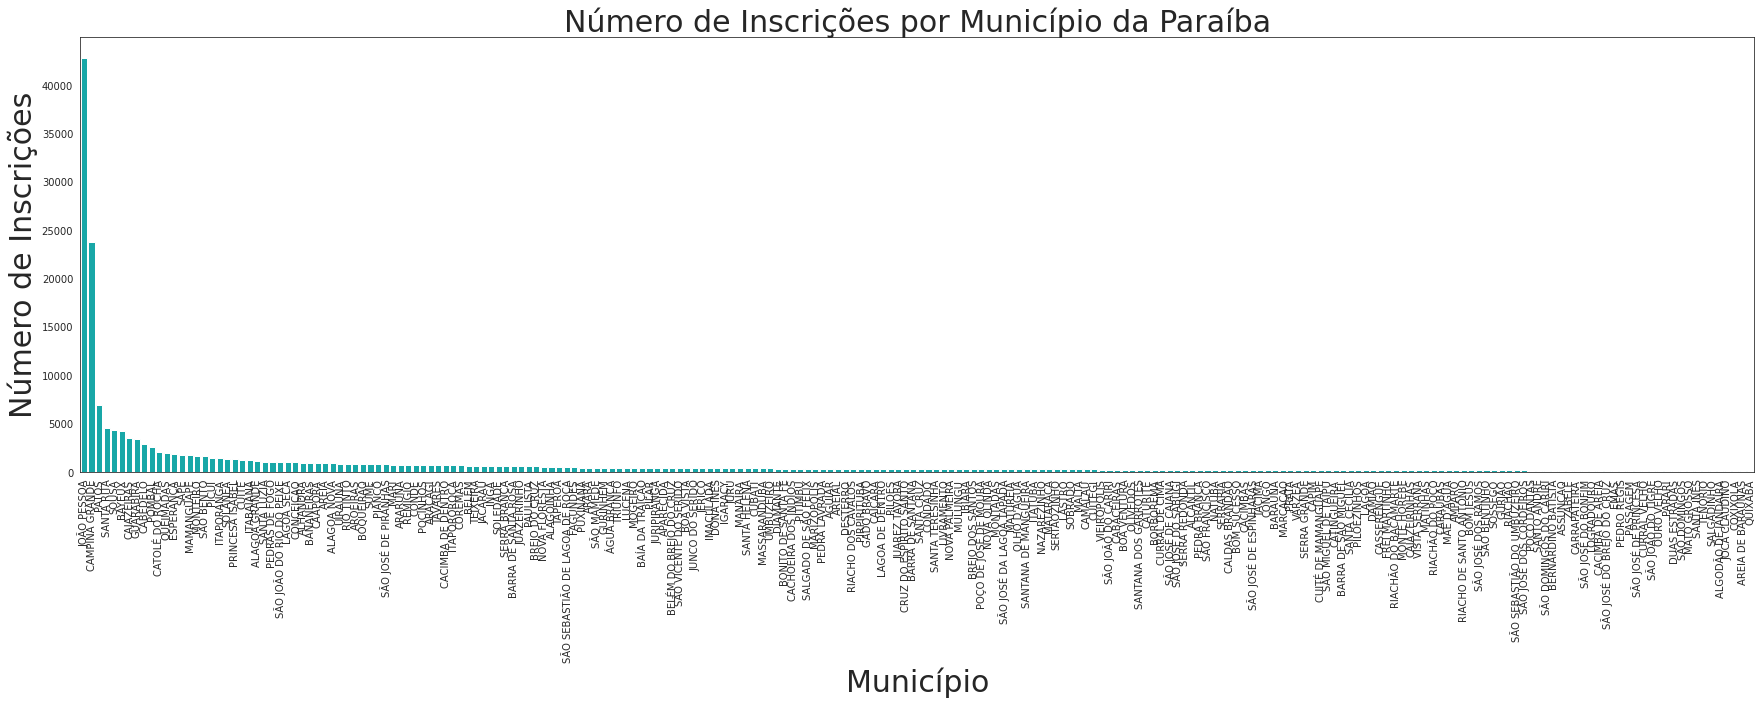

In [10]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x ='NO_MUNICIPIO_RESIDENCIA', y ='NU_INSCRICAO', color="c", data = N_municipio)
plt.xticks(rotation=90)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Número de Inscrições", fontsize=30);


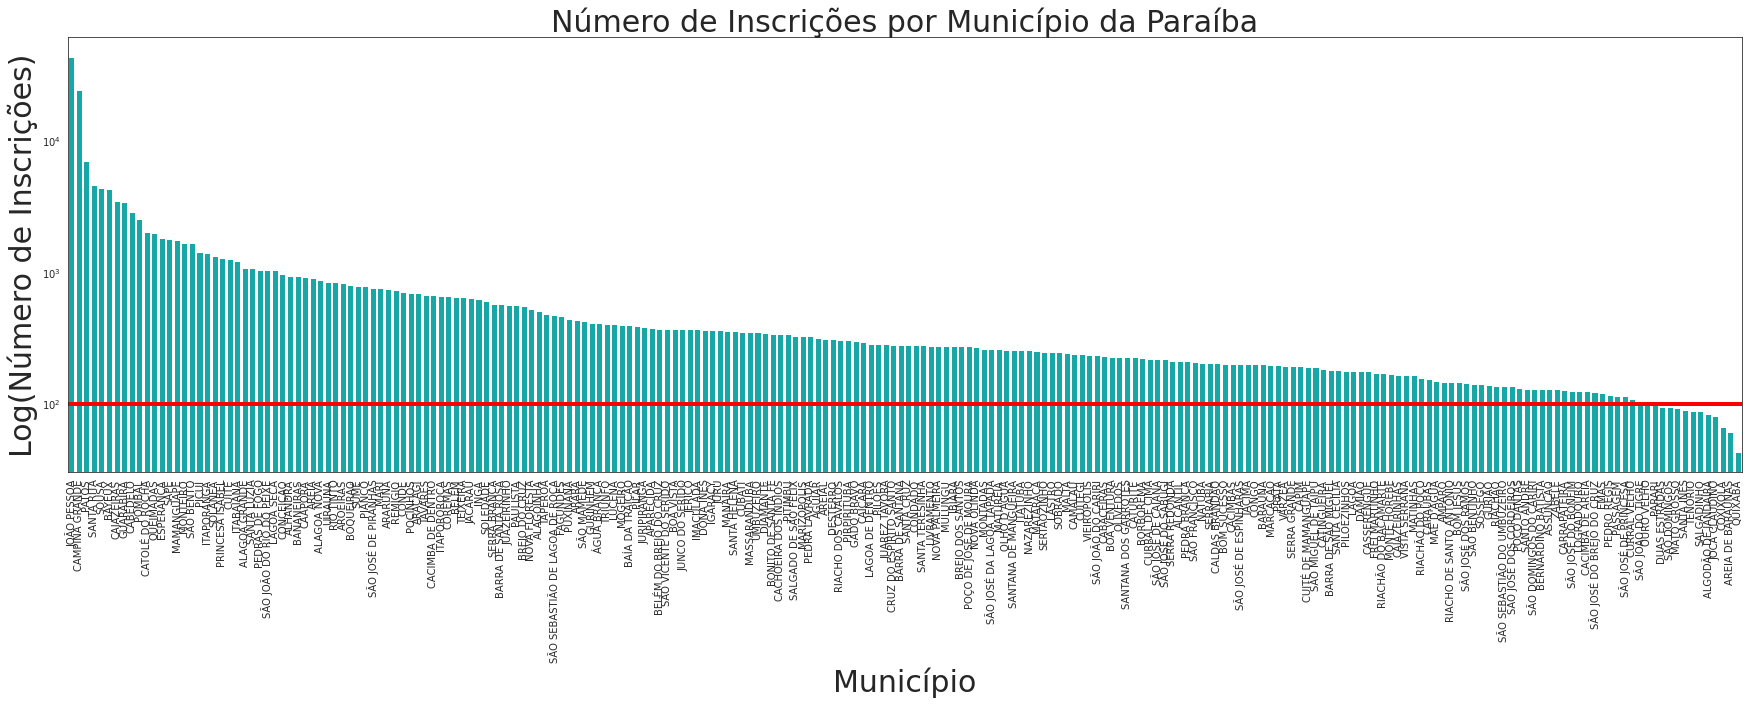

In [11]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x = 'NO_MUNICIPIO_RESIDENCIA', y = 'NU_INSCRICAO', color="c", data = N_municipio)
plt.yscale("log")
plt.xticks(rotation=90)
plt.axhline(y=100, color = 'r', ls = '-', linewidth=4)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Log(Número de Inscrições)", fontsize=30);

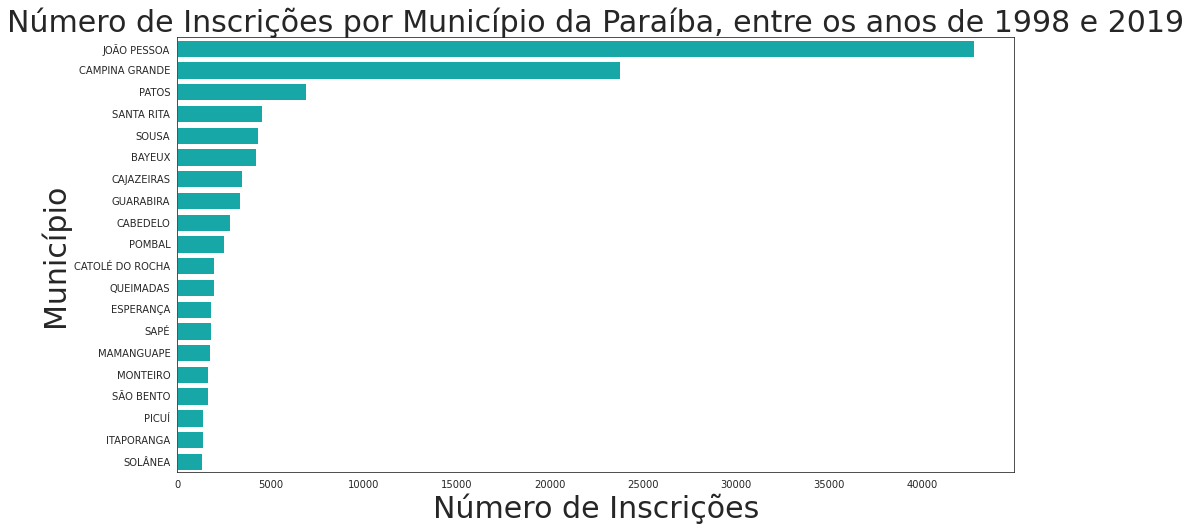

In [12]:
#@title
# eu fiz esa visualiação pra tu julgar se fica melhor de ver as mais relevantes

mais_inscritos = N_municipio.head(20)
sns.set_style("white")
plt.subplots(figsize=(15,8))
sns.barplot(y ='NO_MUNICIPIO_RESIDENCIA', x ='NU_INSCRICAO', color="c", data = mais_inscritos)
plt.title("Número de Inscrições por Município da Paraíba, entre os anos de 1998 e 2019", fontsize=30)
plt.ylabel("Município", fontsize=30)
plt.xlabel("Número de Inscrições", fontsize=30);

In [13]:
#@title
N_municipio_ano=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA', 'NU_ANO'], as_index=False)['NU_INSCRICAO'].count()
N_municipio_ano.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio_ano['Porcentagem']=N_municipio_ano['NU_INSCRICAO']/N_municipio_ano['NU_INSCRICAO'].sum()*100
# N_municipio_ano

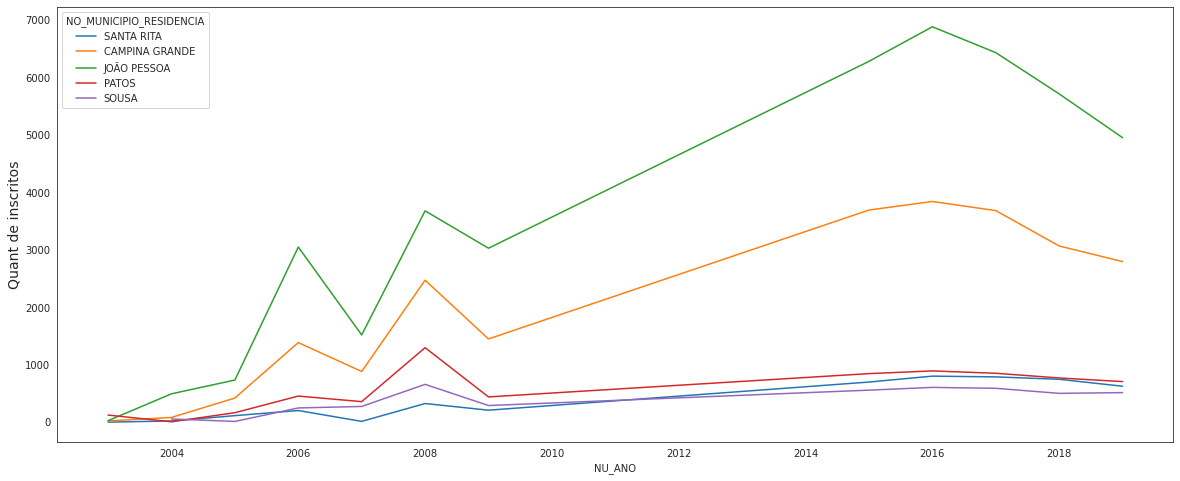

In [14]:
#@title
n = 5
plot_maiores = N_municipio_ano[N_municipio_ano['NO_MUNICIPIO_RESIDENCIA'].isin(mais_inscritos.head(n).NO_MUNICIPIO_RESIDENCIA.tolist())].sort_values(by='NU_ANO')
# display(plot_maiores)

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=plot_maiores, x="NU_ANO", y="NU_INSCRICAO", hue="NO_MUNICIPIO_RESIDENCIA")
plt.ylabel('Quant de inscritos', fontsize=14);

In [15]:
#@title
fig = px.line(plot_maiores, x="NU_ANO", y="NU_INSCRICAO", color="NO_MUNICIPIO_RESIDENCIA", title='Mesmo gráfico de cima, mas na biblioteca Plotly',width=1600, height=750)
fig.show()

In [16]:
#@title
sexo_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_SEXO'])['NU_INSCRICAO'].count().reset_index()
sexo_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
sexo_por_anos.sample(10)

,NU_ANO,TP_SEXO,INSCRITOS
0,2003,F,381
17,2016,M,12664
18,2017,F,16121
6,2006,F,7242
14,2015,F,15661
8,2007,F,5981
23,2019,M,10516
22,2019,F,13552
12,2009,F,6780
21,2018,M,11265


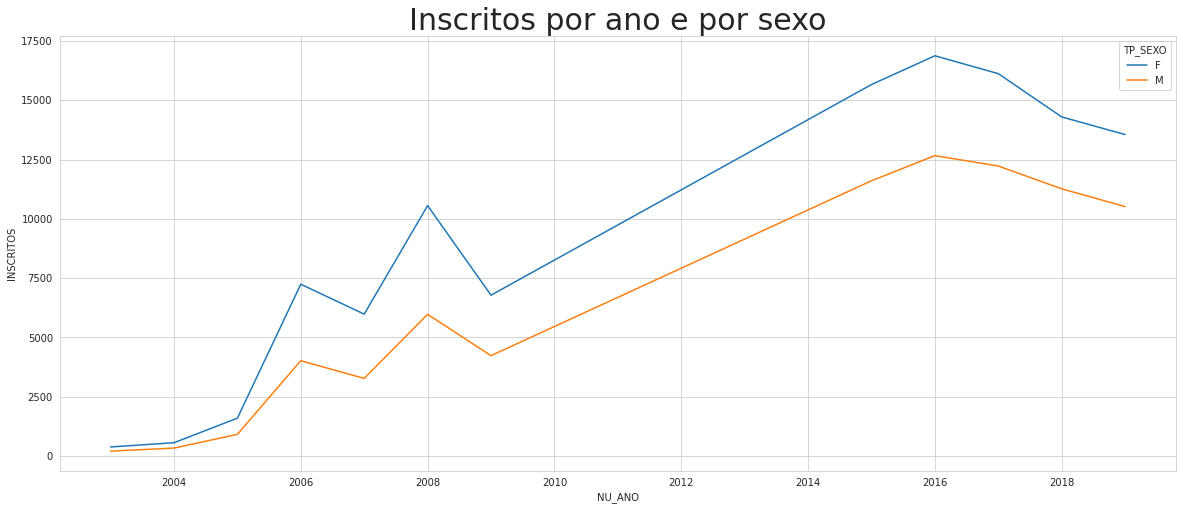

In [17]:
#@title
analise_por_anos_sexo = sexo_por_anos.groupby(by=['NU_ANO', 'TP_SEXO']).sum()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=analise_por_anos_sexo, x="NU_ANO", y="INSCRITOS", hue="TP_SEXO")
plt.title("Inscritos por ano e por sexo", fontsize=30);

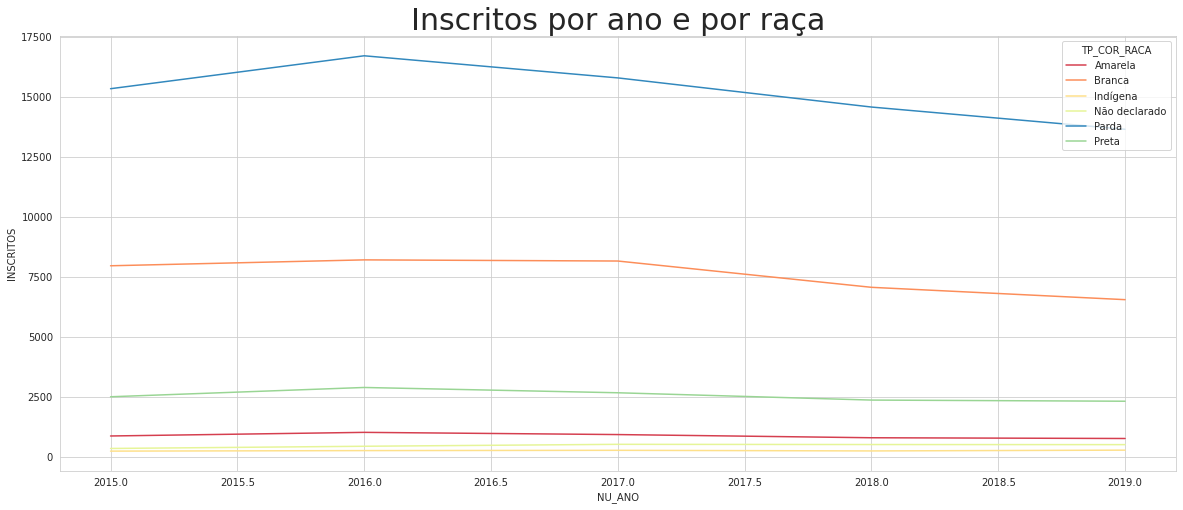

In [18]:
#@title
raça_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_COR_RACA'])['NU_INSCRICAO'].count().reset_index()
raça_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.lineplot(data=raça_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_COR_RACA", palette=['#d53e4f','#fc8d59','#fee08b','#e6f598','#3288bd','#99d594'])
plt.title("Inscritos por ano e por raça", fontsize=30);

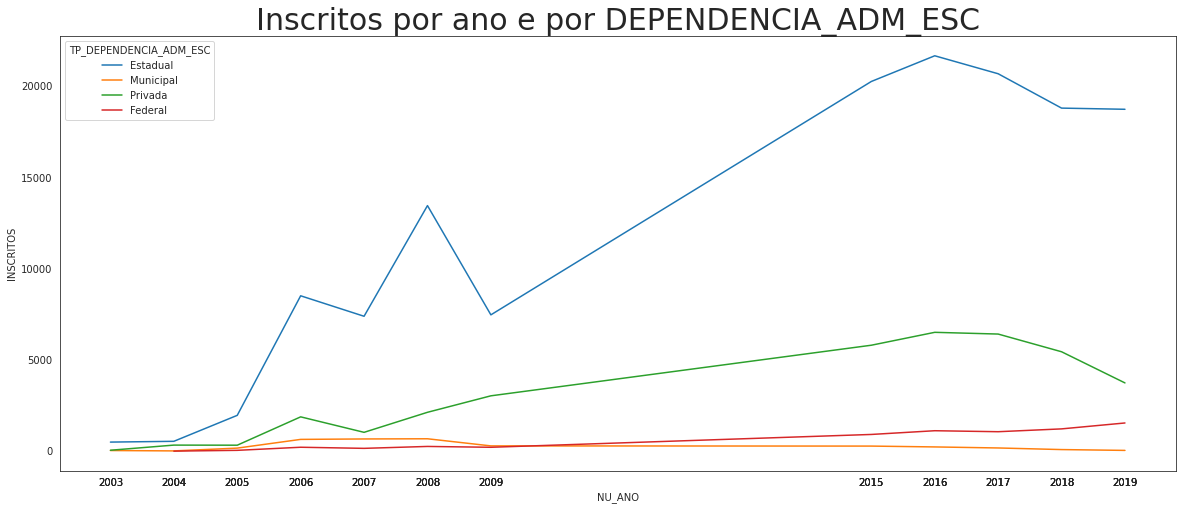

In [19]:
#@title
DepEsc_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])['NU_INSCRICAO'].count().reset_index()
DepEsc_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=DepEsc_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_DEPENDENCIA_ADM_ESC")
plt.xticks(DepEsc_por_anos.NU_ANO)
plt.title("Inscritos por ano e por DEPENDENCIA_ADM_ESC", fontsize=30);

In [20]:
#@title
df_Escolaridade_Mae = dfEnem.groupby(by=['NU_ANO', 'Escolaridade_Mae'])['NU_INSCRICAO'].count().reset_index()
df_Escolaridade_Mae

,NU_ANO,Escolaridade_Mae,NU_INSCRICAO
0,2003,Ensino Médio Completo,82
1,2003,Ensino Médio Incompleto,28
2,2003,Fundamental Completo,106
3,2003,Fundamental Incompleto,241
4,2003,Pós-Graduação,17
...,...,...,...
86,2019,Fundamental Completo,4070
87,2019,Fundamental Incompleto,4956
88,2019,Pós-Graduação,1400
89,2019,Sem Estudo,1239


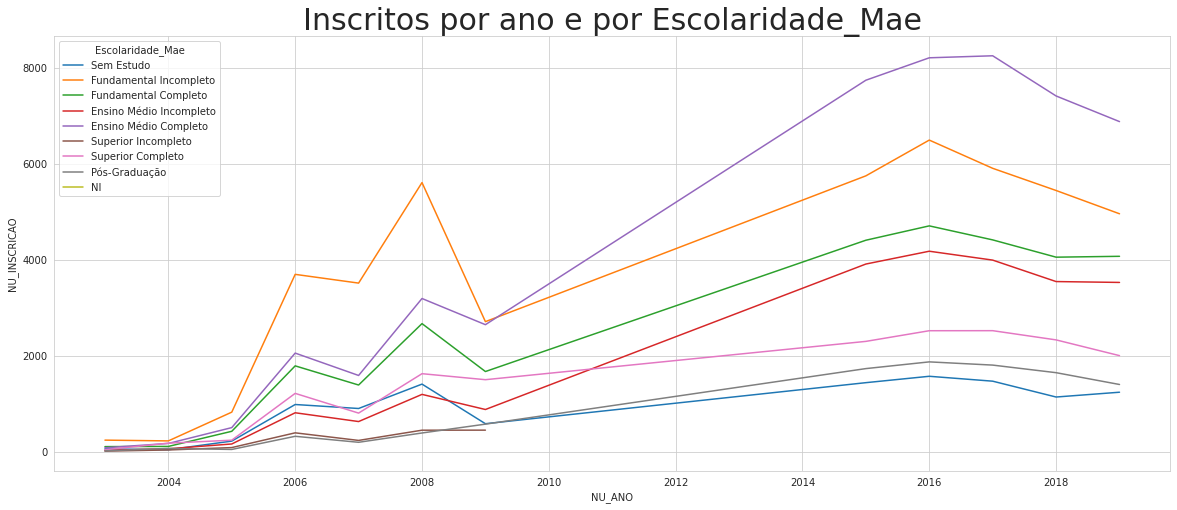

In [21]:
#@title
df_Escolaridade_Mae = dfEnem.groupby(by=['NU_ANO', 'Escolaridade_Mae'])['NU_INSCRICAO'].count().reset_index()
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
hue_order = ['Sem Estudo', 'Fundamental Incompleto', 'Fundamental Completo', 'Ensino Médio Incompleto', 'Ensino Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós-Graduação', 'NI']
sns.lineplot(data=df_Escolaridade_Mae, x="NU_ANO", y="NU_INSCRICAO", hue="Escolaridade_Mae", ci=None, hue_order=hue_order)
plt.title("Inscritos por ano e por Escolaridade_Mae", fontsize=30);

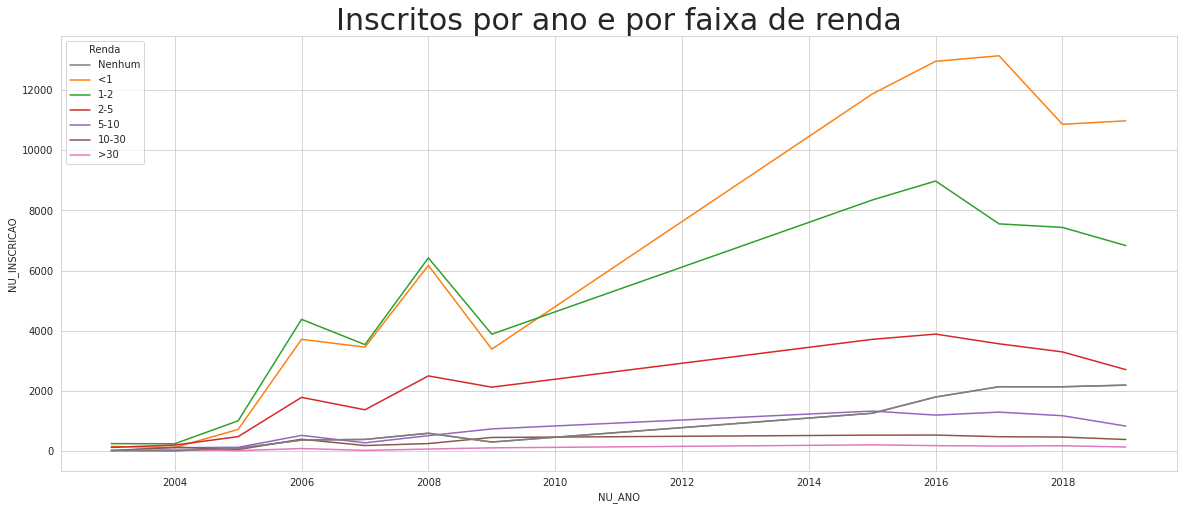

In [22]:
#@title
df_renda = dfEnem.groupby(by=['NU_ANO', 'Renda'])['NU_INSCRICAO'].count().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
sns.lineplot(data=df_renda, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order)
plt.title("Inscritos por ano e por faixa de renda", fontsize=30);

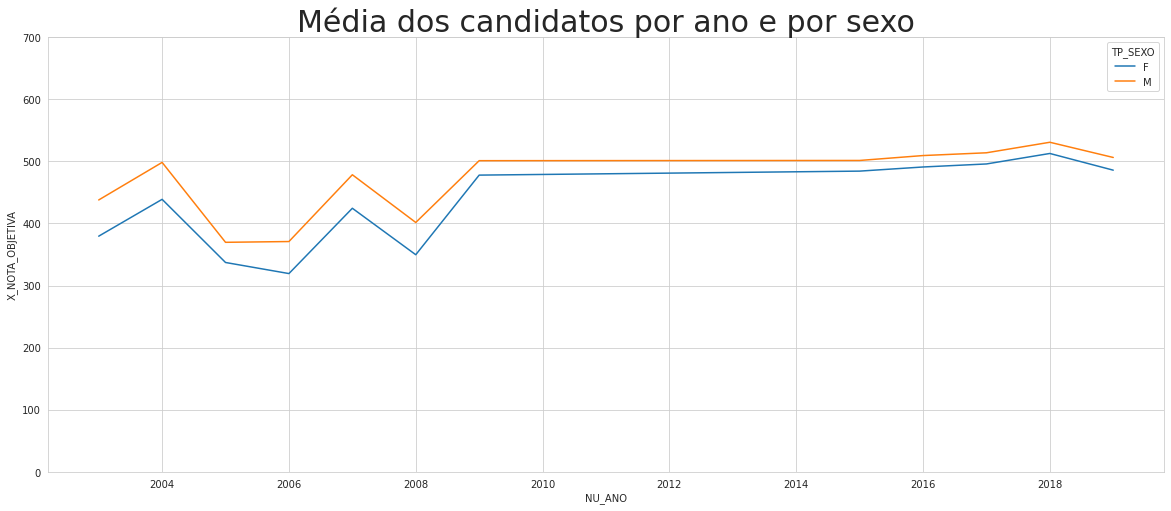

In [25]:
#@title
############################ NÃO SEI SE ESSA INFORMAÇÃO TRAZ MUITO VALOR AGREGADO ############################

df_media_sexo = dfEnem.query('TP_PRESENCA == 1').groupby(by=['NU_ANO', 'TP_SEXO'])['X_NOTA_OBJETIVA'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=df_media_sexo, x="NU_ANO", y="X_NOTA_OBJETIVA", hue="TP_SEXO")
plt.ylim(0, 700)
plt.title("Média dos candidatos por ano e por sexo", fontsize=30);

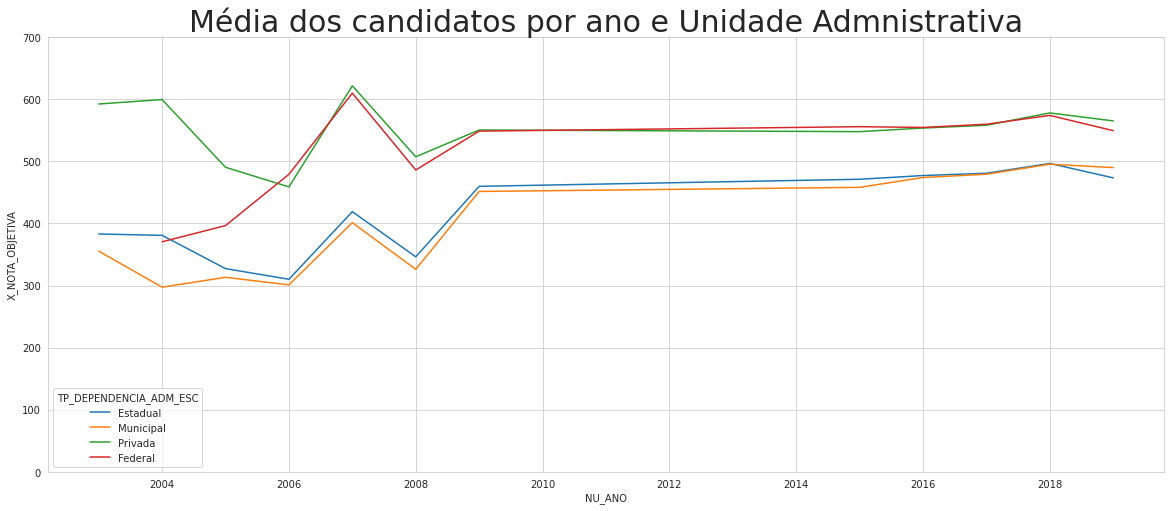

In [26]:
#@title
df_media = dfEnem.query('TP_PRESENCA == 1').groupby(by=['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])['X_NOTA_OBJETIVA'].mean().reset_index()
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=df_media, x="NU_ANO", y="X_NOTA_OBJETIVA", hue="TP_DEPENDENCIA_ADM_ESC")
plt.ylim(0, 700)
plt.title("Média dos candidatos por ano e Unidade Admnistrativa", fontsize=30);

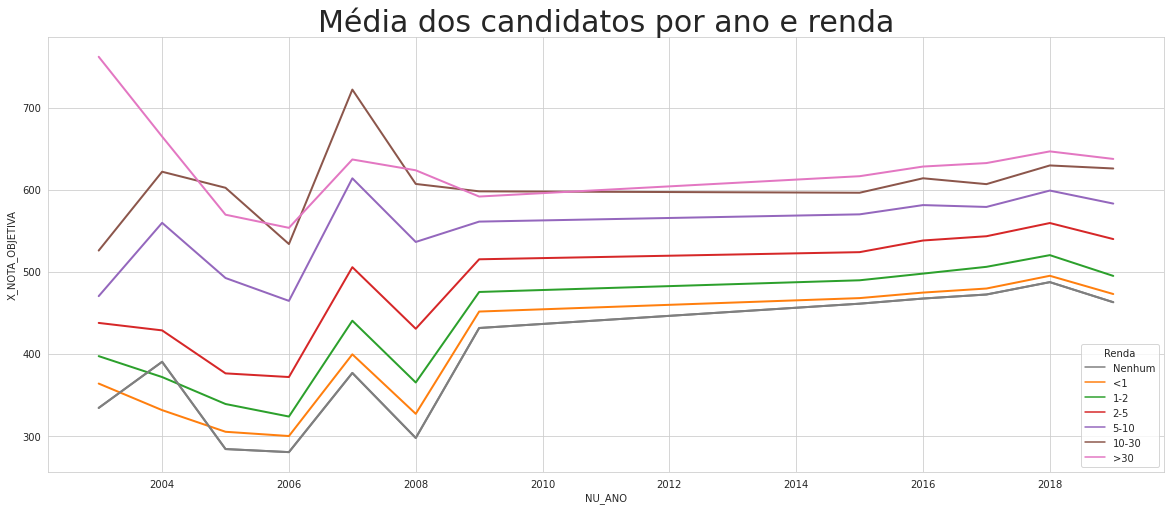

In [27]:
#@title
df_media_renda = dfEnem.query('TP_PRESENCA == 1').groupby(by=['NU_ANO', 'Renda'])['X_NOTA_OBJETIVA'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("white")
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
sns.lineplot(data=df_media_renda, x="NU_ANO", y="X_NOTA_OBJETIVA", hue="Renda", hue_order=hue_order, linewidth = 2)
plt.title("Média dos candidatos por ano e renda", fontsize=30);

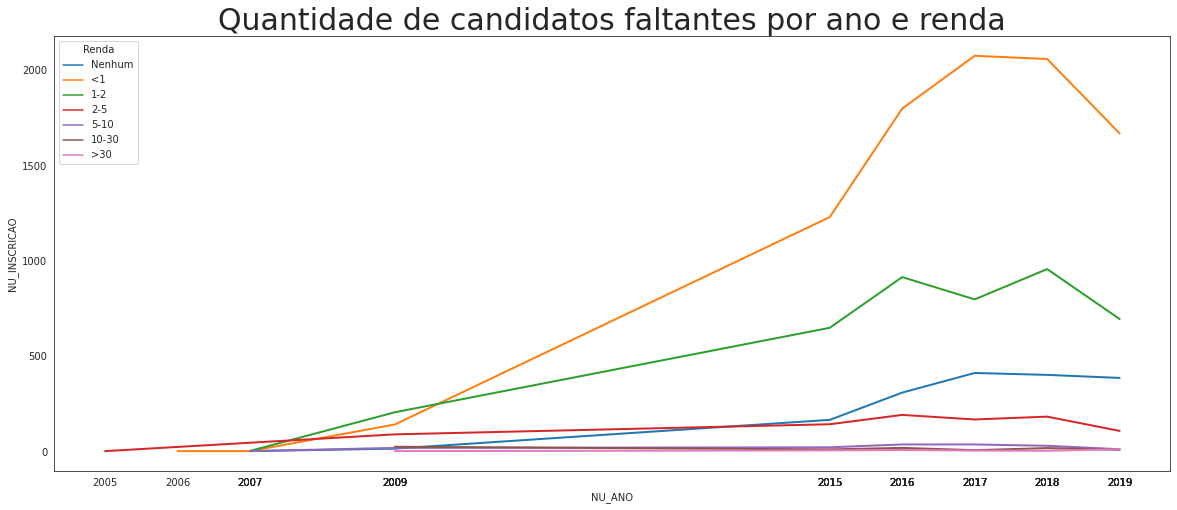

In [28]:
#@title
df_renda_faltantes = dfEnem.query('TP_PRESENCA == 0').groupby(by=['NU_ANO','Renda']).count().reset_index()
plt.subplots(figsize=(20,8))
sns.set_style('white')
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30']
sns.lineplot(data=df_renda_faltantes, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order, linewidth = 2)
plt.xticks(df_renda_faltantes.NU_ANO)
plt.title("Quantidade de candidatos faltantes por ano e renda", fontsize=30);

In [29]:
#@title
def grafico_temporal(data, y, hue, hue_order='None'):
    sns.lineplot(data, x="NU_ANO", y=y, hue=hue, linewidth=2, hue_order=hue_order)
    plt.title(f"Media dos candidatos por ano e {hue}", fontsize=30);

In [ ]:
#@title
# grafico_temporal(df_media_renda, ['NU_MEDIA_GERAL'], ['TP_COR_RACA'])

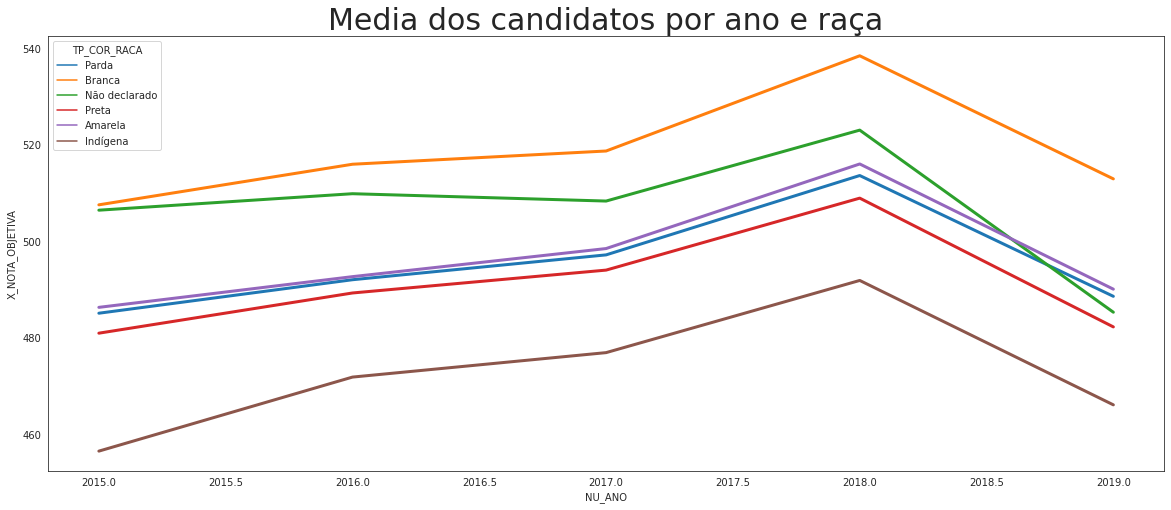

In [32]:
#@title
df_media_renda = dfEnem.query('TP_PRESENCA == 1').groupby(by=['NU_ANO', 'TP_COR_RACA'])['X_NOTA_OBJETIVA'].mean().reset_index()

plt.subplots(figsize=(20,8))
sns.set_style("white")
hue_order = ['Parda', 'Branca', 'Não declarado', 'Preta', 'Amarela', 'Indígena']
sns.lineplot(data=df_media_renda, x="NU_ANO", y="X_NOTA_OBJETIVA", hue="TP_COR_RACA", linewidth = 3, hue_order=hue_order)
# plt.ylim(0, 650)
plt.title("Media dos candidatos por ano e raça", fontsize=30);

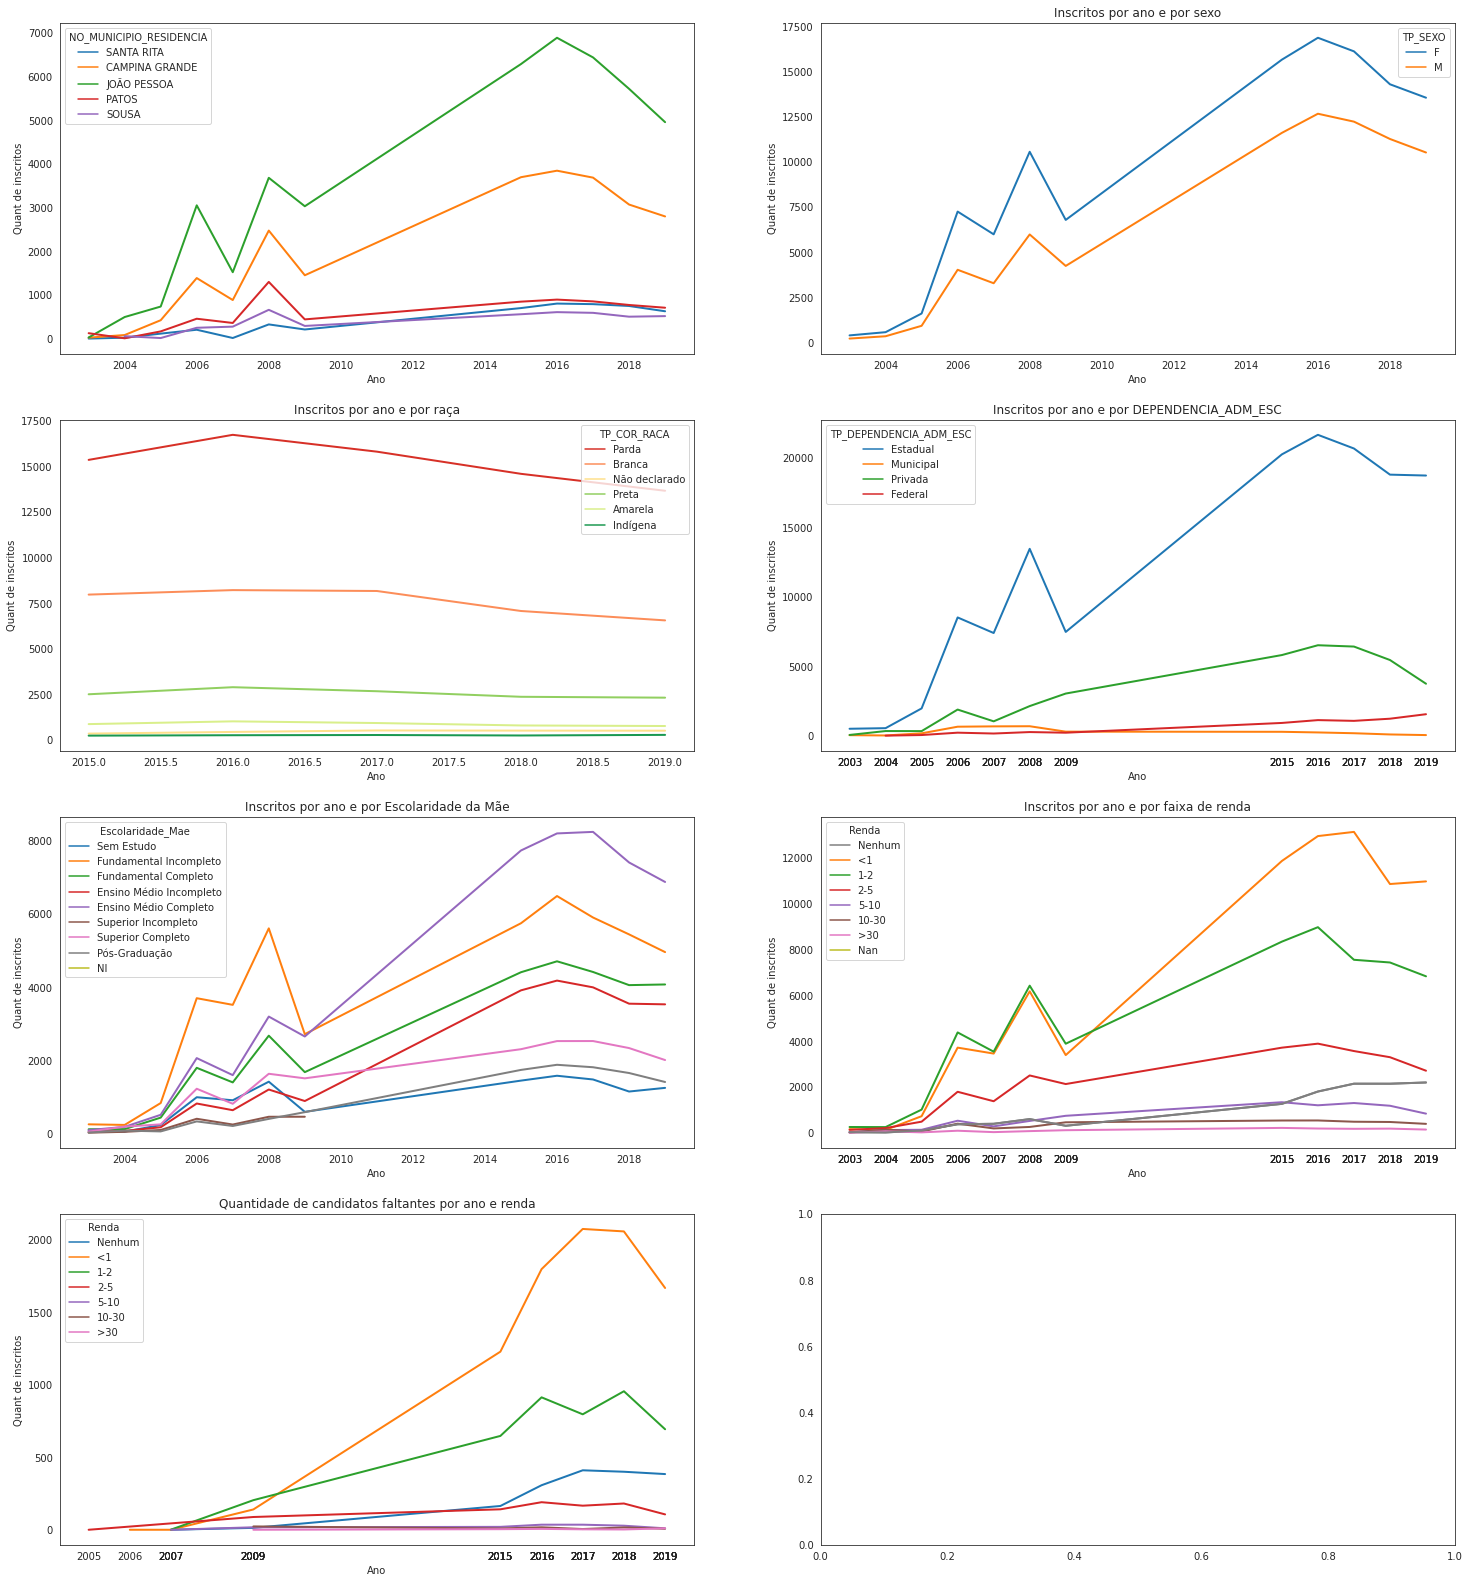

In [33]:
#@title
fig, axes = plt.subplots(4, 2, figsize=(25, 28))

sns.set_style("white")

plot_maiores = N_municipio_ano[N_municipio_ano['NO_MUNICIPIO_RESIDENCIA'].isin(mais_inscritos.head(n).NO_MUNICIPIO_RESIDENCIA.tolist())].sort_values(by='NU_ANO')
sns.lineplot(ax=axes[0, 0], data=plot_maiores, x="NU_ANO", y="NU_INSCRICAO", hue="NO_MUNICIPIO_RESIDENCIA", linewidth = 2)
axes[0,0].set_ylabel('Quant de inscritos')
axes[0,0].set_xlabel('Ano')

analise_por_anos_sexo = sexo_por_anos.groupby(by=['NU_ANO', 'TP_SEXO']).sum()
sns.lineplot(ax=axes[0, 1], data=analise_por_anos_sexo, x="NU_ANO", y="INSCRITOS", hue="TP_SEXO", linewidth = 2)
axes[0,1].set_ylabel('Quant de inscritos')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_title('Inscritos por ano e por sexo')

raça_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_COR_RACA'])['NU_INSCRICAO'].count().reset_index()
raça_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
hue_order = ['Parda', 'Branca', 'Não declarado', 'Preta', 'Amarela', 'Indígena']
sns.lineplot(ax=axes[1, 0], data=raça_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_COR_RACA", hue_order=hue_order, 
             palette=['#d73027','#fc8d59','#fee08b','#91cf60','#d9ef8b','#1a9850'], linewidth = 2)
axes[1,0].set_ylabel('Quant de inscritos')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_title('Inscritos por ano e por raça')

DepEsc_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_DEPENDENCIA_ADM_ESC'])['NU_INSCRICAO'].count().reset_index()
DepEsc_por_anos.rename(columns = {'NU_INSCRICAO':'INSCRITOS'}, inplace = True)
sns.lineplot(ax=axes[1, 1], data=DepEsc_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_DEPENDENCIA_ADM_ESC", linewidth = 2)
axes[1,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[1,1].set_ylabel('Quant de inscritos')
axes[1,1].set_xlabel('Ano')
axes[1,1].set_title('Inscritos por ano e por DEPENDENCIA_ADM_ESC')

df_Escolaridade_Mae = dfEnem.groupby(by=['NU_ANO', 'Escolaridade_Mae'])['NU_INSCRICAO'].count().reset_index()
hue_order = ['Sem Estudo', 'Fundamental Incompleto', 'Fundamental Completo', 'Ensino Médio Incompleto', 
             'Ensino Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós-Graduação', 'NI']
sns.lineplot(ax=axes[2, 0], data=df_Escolaridade_Mae, x="NU_ANO", y="NU_INSCRICAO", 
             hue="Escolaridade_Mae", ci=None, hue_order=hue_order, linewidth = 2)
axes[2,0].set_ylabel('Quant de inscritos')
axes[2,0].set_xlabel('Ano')
axes[2,0].set_title('Inscritos por ano e por Escolaridade da Mãe')

df_renda = dfEnem.groupby(by=['NU_ANO', 'Renda'])['NU_INSCRICAO'].count().reset_index()
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum', 'Nan']
sns.lineplot(ax=axes[2, 1], data=df_renda, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order, linewidth = 2)
axes[2,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[2,1].set_ylabel('Quant de inscritos')
axes[2,1].set_xlabel('Ano')
axes[2,1].set_title('Inscritos por ano e por faixa de renda')

df_renda_faltantes = dfEnem.query('TP_PRESENCA == 0').groupby(by=['NU_ANO','Renda']).count().reset_index()
hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30']
sns.lineplot(ax=axes[3, 0], data=df_renda_faltantes, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order, linewidth = 2)
axes[3,0].set_xticks(df_renda_faltantes.NU_ANO)
axes[3,0].set_ylabel('Quant de inscritos')
axes[3,0].set_xlabel('Ano')
axes[3,0].set_title("Quantidade de candidatos faltantes por ano e renda");

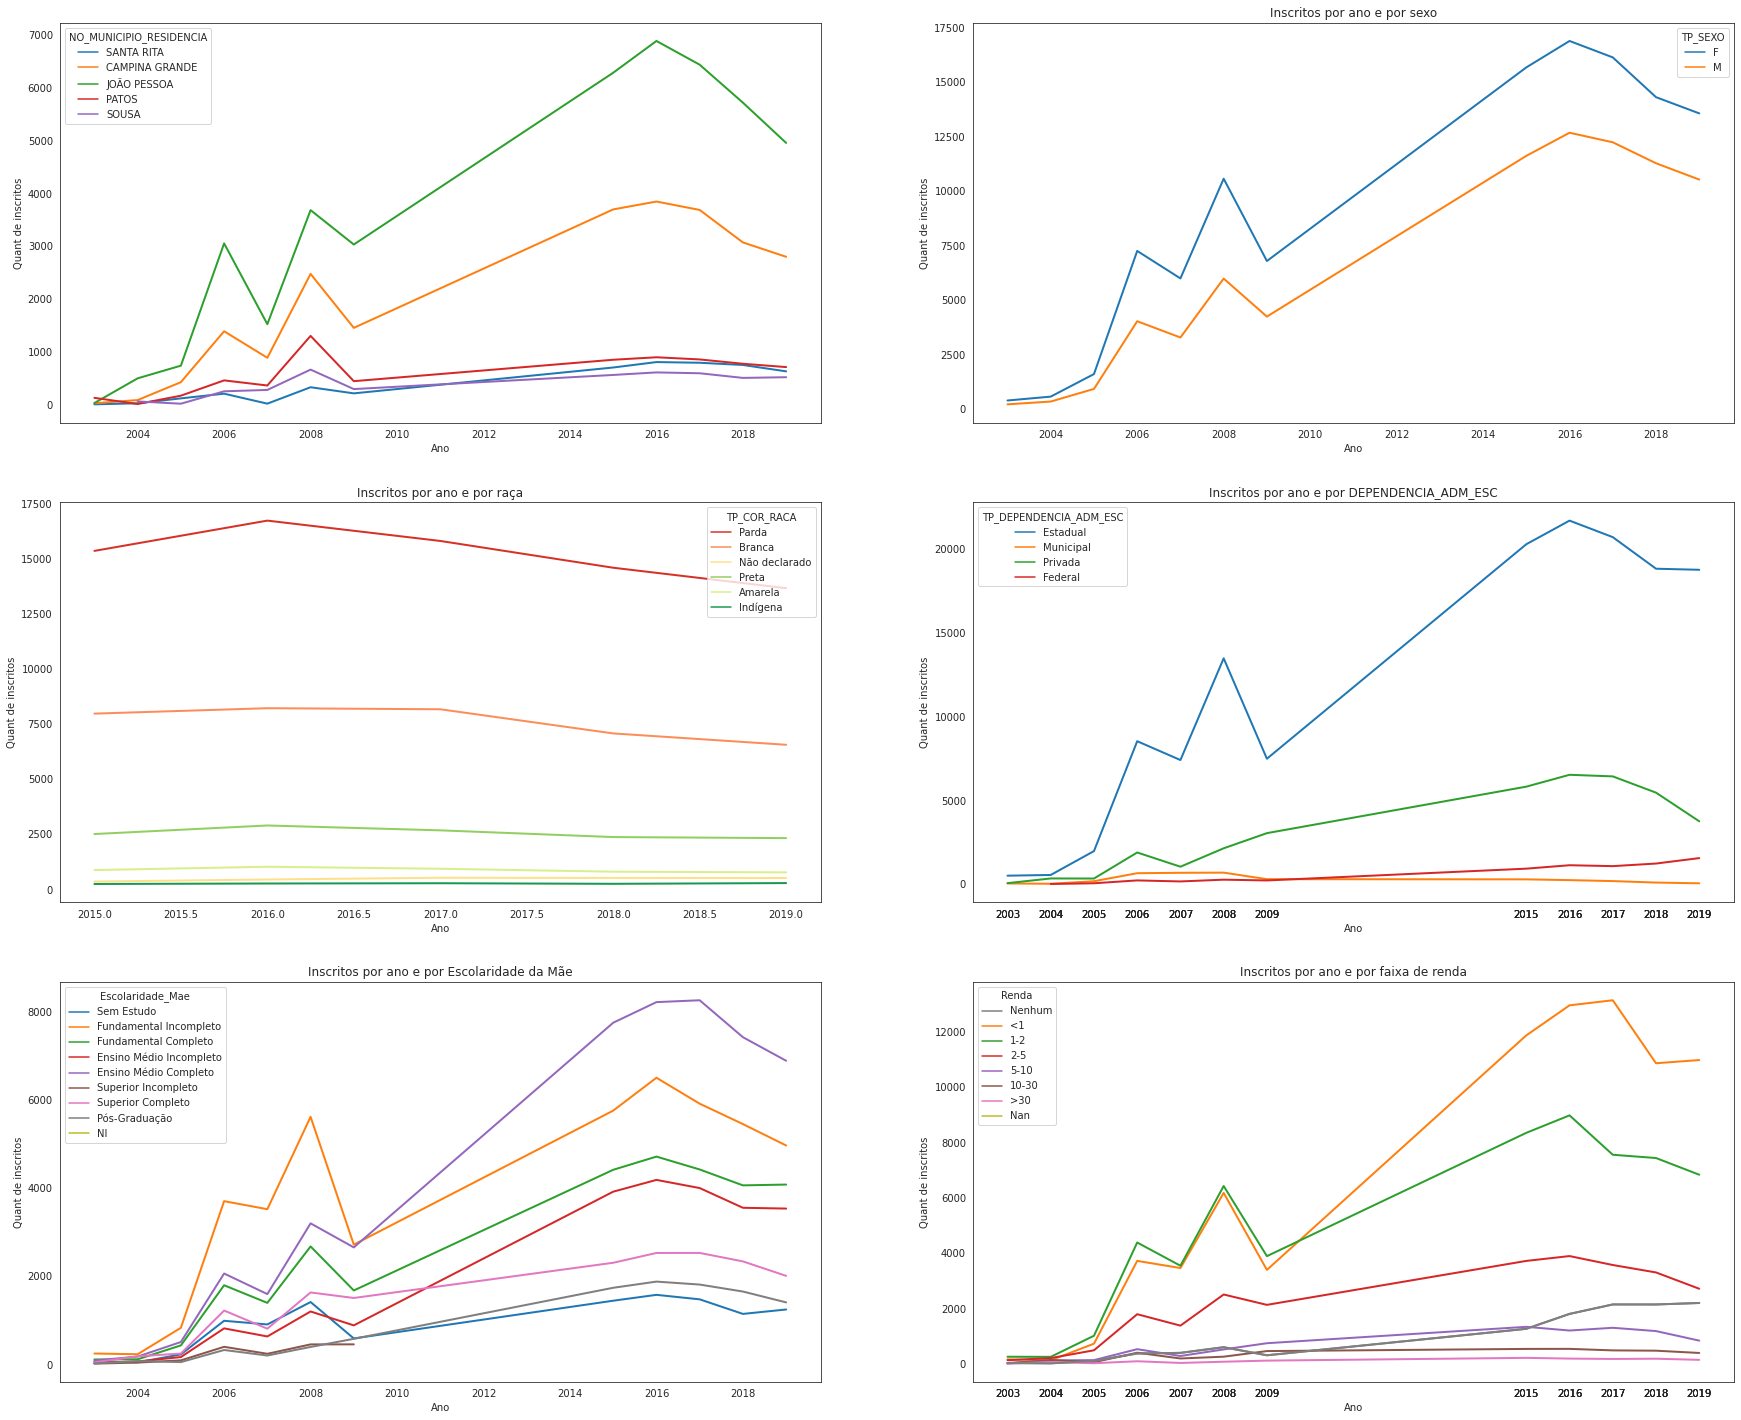

In [34]:
#@title
fig, axes = plt.subplots(3, 2, figsize=(30, 25))

sns.set_style("whitegrid")
sns.lineplot(ax=axes[0, 0], data=plot_maiores, x="NU_ANO", y="NU_INSCRICAO", hue="NO_MUNICIPIO_RESIDENCIA", linewidth = 2)
axes[0,0].set_ylabel('Quant de inscritos')
axes[0,0].set_xlabel('Ano')

sns.lineplot(ax=axes[0, 1], data=analise_por_anos_sexo, x="NU_ANO", y="INSCRITOS", hue="TP_SEXO", linewidth = 2)
axes[0,1].set_ylabel('Quant de inscritos')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_title('Inscritos por ano e por sexo')

hue_order = ['Parda', 'Branca', 'Não declarado', 'Preta', 'Amarela', 'Indígena']
sns.lineplot(ax=axes[1, 0], data=raça_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_COR_RACA", hue_order=hue_order, 
             palette=['#d73027','#fc8d59','#fee08b','#91cf60','#d9ef8b','#1a9850'], linewidth = 2)
axes[1,0].set_ylabel('Quant de inscritos')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_title('Inscritos por ano e por raça')

sns.lineplot(ax=axes[1, 1], data=DepEsc_por_anos, x="NU_ANO", y="INSCRITOS", hue="TP_DEPENDENCIA_ADM_ESC", linewidth = 2)
axes[1,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[1,1].set_ylabel('Quant de inscritos')
axes[1,1].set_xlabel('Ano')
axes[1,1].set_title('Inscritos por ano e por DEPENDENCIA_ADM_ESC')

hue_order = ['Sem Estudo', 'Fundamental Incompleto', 'Fundamental Completo', 'Ensino Médio Incompleto', 
             'Ensino Médio Completo', 'Superior Incompleto', 'Superior Completo', 'Pós-Graduação', 'NI']
sns.lineplot(ax=axes[2, 0], data=df_Escolaridade_Mae, x="NU_ANO", y="NU_INSCRICAO", 
             hue="Escolaridade_Mae", ci=None, hue_order=hue_order, linewidth = 2)
axes[2,0].set_ylabel('Quant de inscritos')
axes[2,0].set_xlabel('Ano')
axes[2,0].set_title('Inscritos por ano e por Escolaridade da Mãe')

hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum', 'Nan']
sns.lineplot(ax=axes[2, 1], data=df_renda, x="NU_ANO", y="NU_INSCRICAO", hue="Renda", hue_order=hue_order, linewidth = 2)
axes[2,1].set_xticks(DepEsc_por_anos.NU_ANO)
axes[2,1].set_ylabel('Quant de inscritos')
axes[2,1].set_xlabel('Ano')
axes[2,1].set_title('Inscritos por ano e por faixa de renda');

# sns.set_style("white")
# hue_order = ['Nenhum', '<1', '1-2', '2-5', '5-10', '10-30', '>30', 'Nenhum']
# sns.lineplot(data=df_media_renda, x="NU_ANO", y="NU_MEDIA_GERAL", hue="Renda", hue_order=hue_order, linewidth = 2)
# plt.title("Media dos candidatos por ano e renda", fontsize=30);

In [ ]:
#@title
dfEnem.columns

##**População estimada da Paraíba**

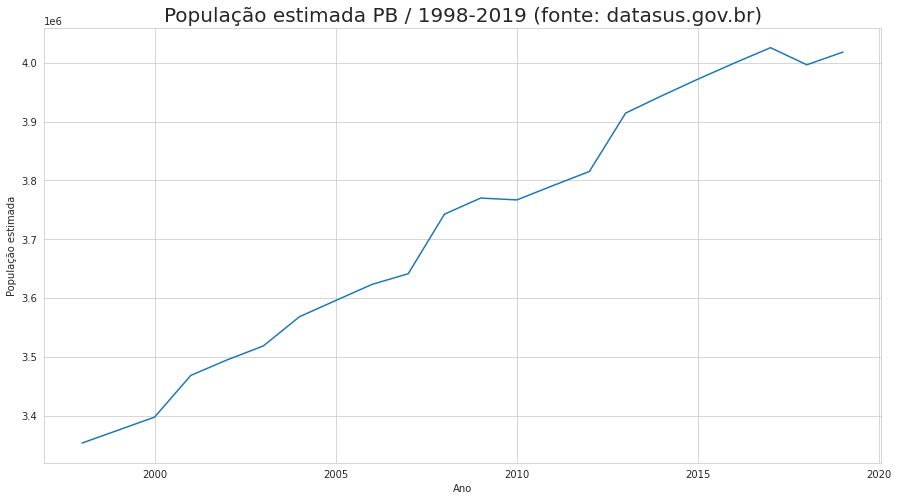

In [40]:
#@title
pop_PB = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_ICD_UFPB_EnemPB/main/DADOS/pop_PB.csv', sep=';', encoding="latin-1")
pop_PB.drop([0,1,2,4], inplace=True)
pop_PB.rename(columns={'Macrorregião de Saúde':'População da Paraíba'}, inplace=True)
pop_PB = pop_PB.T.reset_index()
pop_PB.columns = pop_PB.iloc[0]
pop_PB = pop_PB[1:]
pop_PB['População da Paraíba'] = pd.to_numeric(pop_PB['População da Paraíba'])
pop_PB['Total'] = pd.to_numeric(pop_PB['Total'])
# pop_PB.dtypes

plt.figure(figsize=(15,8))
sns.lineplot(data=pop_PB, x='População da Paraíba', y='Total')
plt.xlabel('Ano')
plt.ylabel('População estimada')
plt.title('População estimada PB / 1998-2019 (fonte: datasus.gov.br)', fontsize=20);
# http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/poptpb.def
# http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/poppb.def  <- nesse daria pra obter a população por sexo, mas os dados só vão até 2012

## População da PB Por Sexo

In [41]:
#@title
pop_PB_Sexo = pd.read_csv('https://raw.githubusercontent.com/mariaeco/Projeto_ICD_UFPB_EnemPB/main/DADOS/PopPB_sexo_1998_2012.csv', sep=',', encoding="latin-1")
pop_PB_Sexo.head(5)

,Ano,Sexo,Populacao
0,2012,M,1847730
1,2012,F,1967440
2,2011,M,1836088
3,2011,F,1955277
4,2010,M,1824379


Text(0, 0.5, 'População estimada')

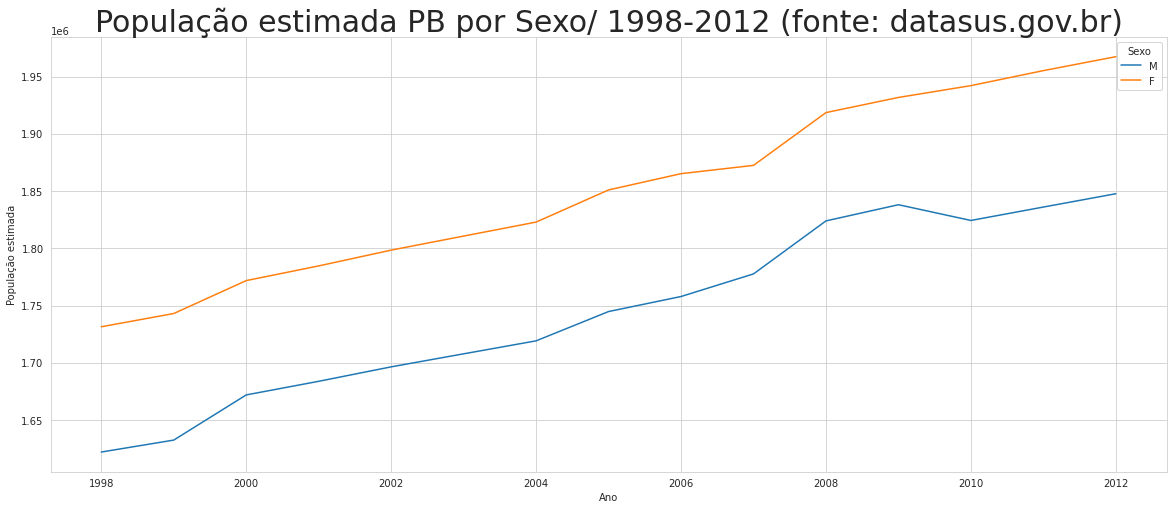

In [42]:
#@title
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=pop_PB_Sexo, x="Ano", y="Populacao", hue="Sexo")
plt.title("População estimada PB por Sexo/ 1998-2012 (fonte: datasus.gov.br)", fontsize=30);
plt.xlabel('Ano')
plt.ylabel('População estimada')

#**ANÁLISES POR BOXPLOTS**

## **Relação entre a nota do Enem e o Tipo de Admnistração da Escola (Federal, Estadual, Municipal, Privada)**


In [45]:
#@title
vars =['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_COR_RACA',
       'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'Escolaridade_Pai', 'Escolaridade_Mae', 'NPessoas', 'Renda',
       'Celular', 'Computador', 'Internet']
dfEnemMELT = pd.melt(dfEnem, id_vars=vars, value_vars=['X_NOTA_OBJETIVA','X_NOTA_CN',	
                                                       'X_NOTA_CH','X_NOTA_LC',
                                                       'X_NOTA_MT','X_NOTA_REDACAO'] )
dfEnemMELT.rename(columns={'value': 'Nota', 'variable':'Prova'}, inplace=True)
dfEnemMELT.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,Prova,Nota
0,1.0,2003,2500205.0,AGUIAR,PB,NaN,24163100.0,2500205.0,Municipal,Urbana,Fundamental Incompleto,Ensino Médio Completo,4.0,1-2,1.0,1.0,1.0,X_NOTA_OBJETIVA,317.5
1,1.0,2003,2500205.0,AGUIAR,PB,NaN,24163100.0,2500205.0,Municipal,Urbana,Sem Estudo,Fundamental Incompleto,4.0,Nenhum,1.0,1.0,1.0,X_NOTA_OBJETIVA,396.8
2,1.0,2003,2500205.0,AGUIAR,PB,NaN,24163100.0,2500205.0,Municipal,Urbana,Fundamental Incompleto,Sem Estudo,2.0,1-2,1.0,1.0,1.0,X_NOTA_OBJETIVA,317.5
3,1.0,2003,2500205.0,AGUIAR,PB,NaN,24163100.0,2500205.0,Municipal,Urbana,Ensino Médio Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,X_NOTA_OBJETIVA,317.5
4,2.0,2003,2500908.0,ARARA,PB,NaN,24217421.0,2501500.0,Estadual,Urbana,Fundamental Incompleto,Fundamental Incompleto,2.0,1-2,1.0,1.0,1.0,X_NOTA_OBJETIVA,269.8


In [47]:
#@title
dfEnemMELT.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_ESCOLA,CO_MUNICIPIO_ESC,NPessoas,Celular,Computador,Internet,Nota
count,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,1.120884e+06,860136.000000
mean,1.018623e+00,2.014251e+03,2.507763e+06,2.725388e+07,2.510344e+06,4.210723e+00,8.906185e-01,5.504138e-01,6.753509e-01,504.381872
std,1.482934e-01,4.514114e+00,5.023444e+03,7.653790e+06,6.320274e+04,1.334544e+00,3.121174e-01,4.974522e-01,4.682438e-01,116.835796
min,1.000000e+00,2.003000e+03,2.500106e+06,1.100006e+07,1.100023e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000e+00,2.009000e+03,2.504009e+06,2.504950e+07,2.504009e+06,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,435.600000
50%,1.000000e+00,2.016000e+03,2.507507e+06,2.508605e+07,2.507507e+06,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,498.500000
75%,1.000000e+00,2.018000e+03,2.510808e+06,2.509930e+07,2.510808e+06,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,569.100000
max,8.000000e+00,2.019000e+03,3.547809e+06,5.442106e+07,5.300108e+06,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1000.000000


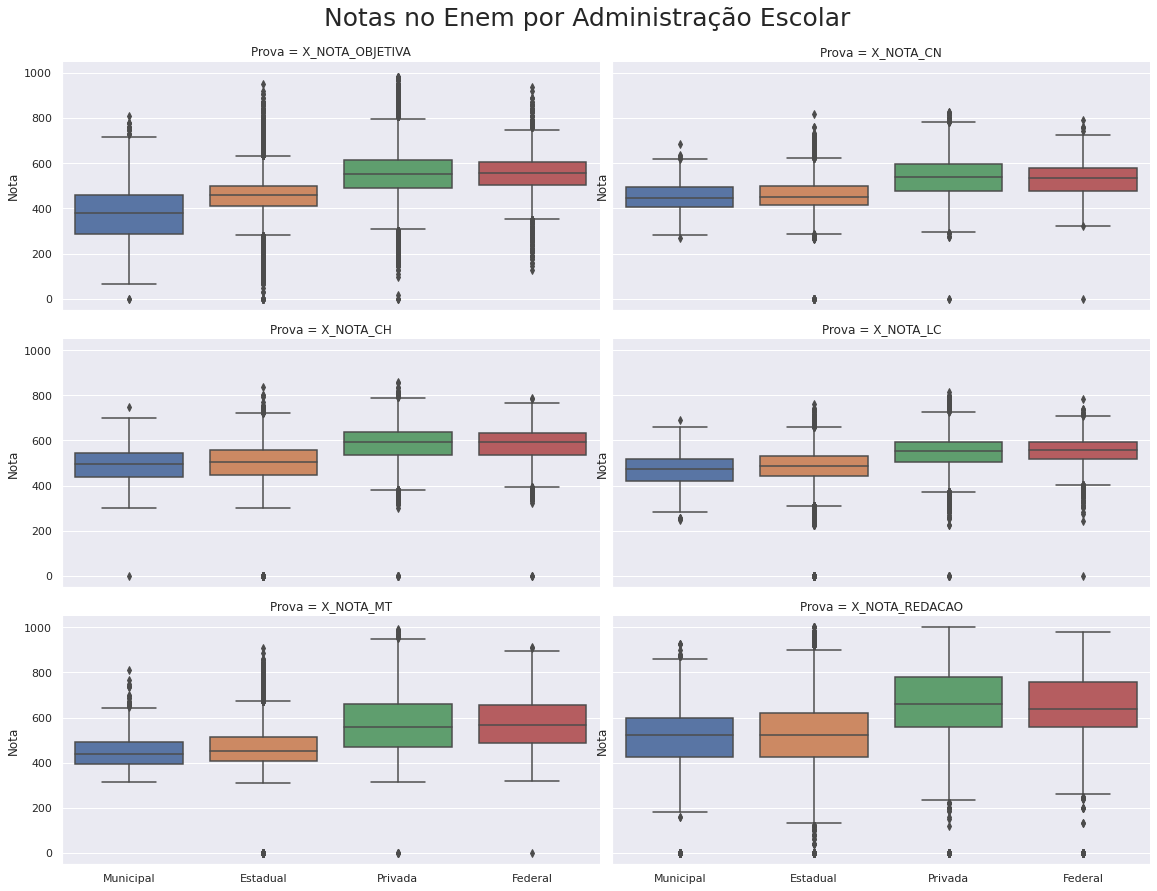

In [48]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_DEPENDENCIA_ADM_ESC", y="Nota", 
                col="Prova",col_wrap=2, 
                kind="box",
                height=4, aspect=2, data=dfEnemMELT);

g.fig.suptitle("Notas no Enem por Administração Escolar",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
# g.set_xticklabels(['Federal', 'Estadual', 'Municipal','Privada']) <- eu comentei essa linha porque achei estranho o desempenho 
#                                                                      das pariculares(últimas, em vermeho, serem tão ruins). Qdo alterei
#                                                                      a ordem foi modificada e ficou o original do dataset
plt.show()

##**Nota por Raça/Cor**
Análise por Boxplot

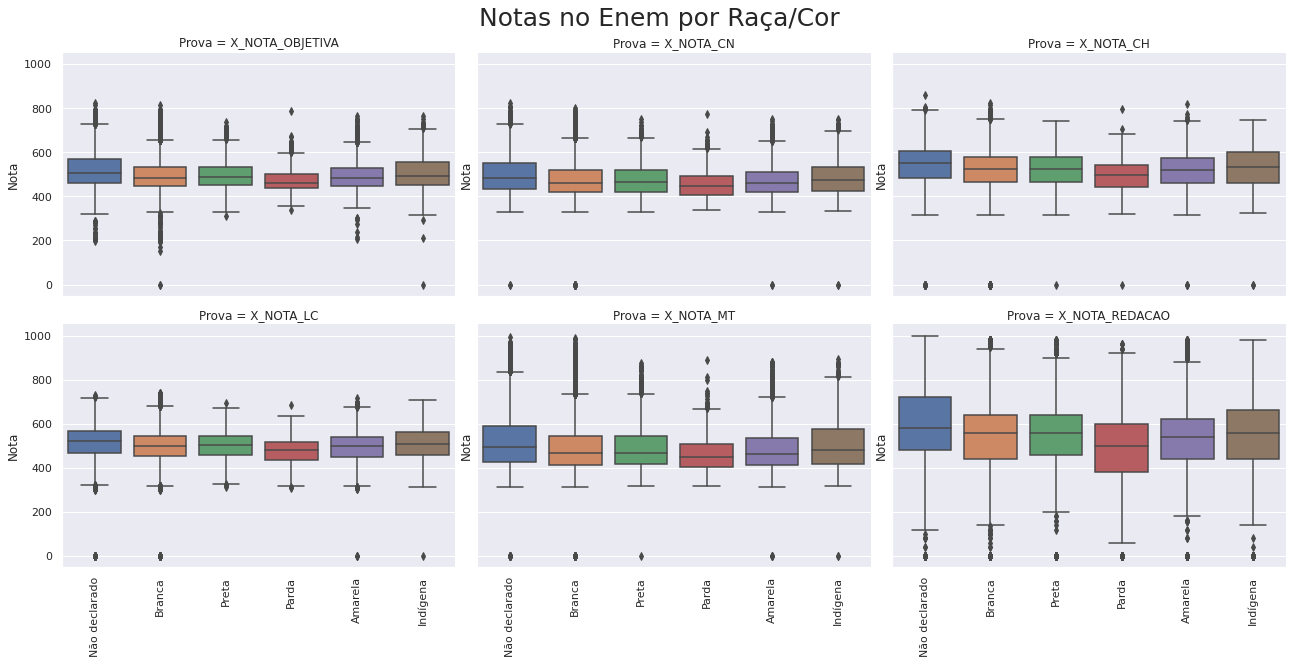

In [49]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_COR_RACA", y="Nota", 
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1.5);
g.fig.suptitle("Notas no Enem por Raça/Cor",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Não declarado', 'Branca', 'Preta','Parda','Amarela','Indígena','NI'], rotation=90)

plt.show()




#**ANÁLISES POR HISTOGRAMAS**

##**Distribuição das Nota do Enem na Paraíba por Localização de escola**

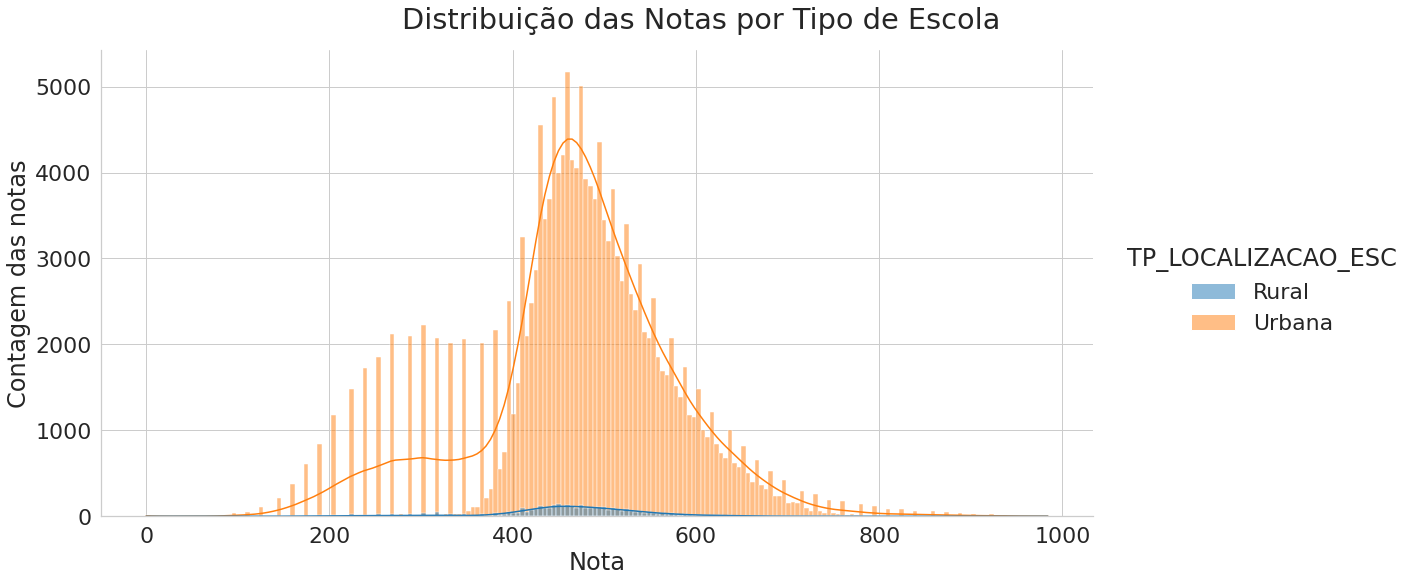

In [52]:
#@title

dfEnem['TP_LOCALIZACAO_ESC'] = dfEnem['TP_LOCALIZACAO_ESC'].replace({1: 'Urbana',2:'Rural'})

# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_LOCALIZACAO_ESC', 
                x ="X_NOTA_OBJETIVA", height=8, aspect=2,bins=200, hue_order=['Rural', 'Urbana'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");

#**ANÁLISES POR SCATTERPLOTS**





##**Gráficos das Relações da Nota Média com  Aspectos Socio-Econômicos**

### *Nota no Enem x Número de Pessoas na Família*

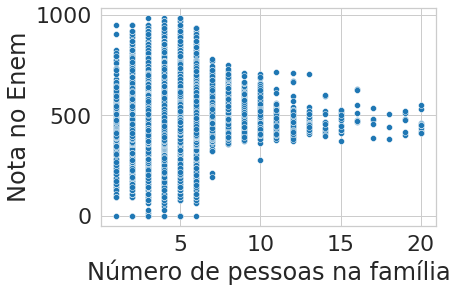

In [54]:
#@title
g = sns.scatterplot(data=dfEnem, x='NPessoas', y="X_NOTA_OBJETIVA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

Há uma dispersão grande no dado de Número de pessoas por família, vamos ver se há uma relação com o tipo de Escola em que Estuda, e a renda

###NOTA POR NÚMERO DE PESSOAS, POR DEPENDENCIA ADMNISTRATIVA DA ESCOLA

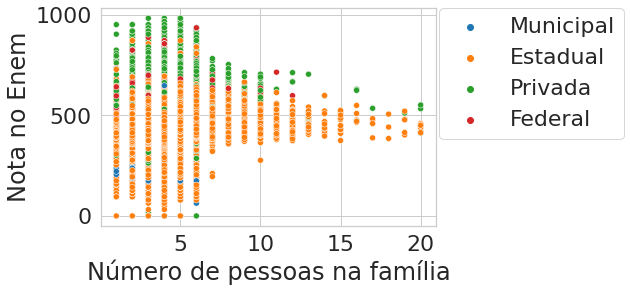

In [59]:
#@title
g = sns.scatterplot(data=dfEnem, x='NPessoas', y="X_NOTA_OBJETIVA", hue="TP_DEPENDENCIA_ADM_ESC")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

Continua sem dar nenhuma explicação, talvez devido a quantidade de NIs.

###NOTA POR NÚMERO DE PESSOAS, POR RENDA

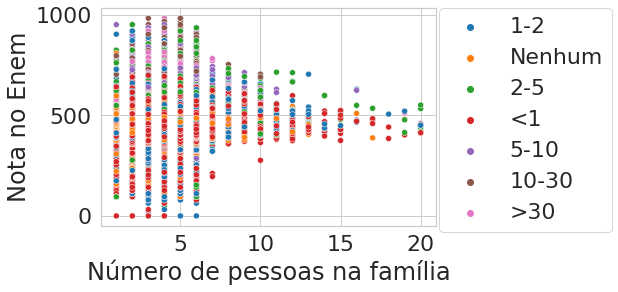

In [57]:
#@title
g = sns.scatterplot(data=dfEnem, x='NPessoas', y="X_NOTA_OBJETIVA", hue="Renda")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

Um pouco mais claro aqui o resultado.
Converter depois a renda em inteiro (o ponto médio da renda)

#**OUTROS BOXPLOTS**

### *Nota no Enem x Renda Familiar*

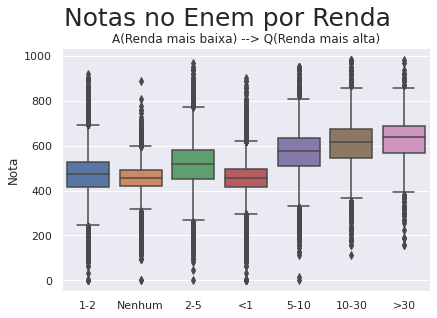

In [61]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="Renda", y="X_NOTA_OBJETIVA", #hue = dose
                data=dfEnem, kind="box",
                height=4, aspect=1.5);

g.fig.suptitle("Notas no Enem por Renda",y=1.1, fontsize=25)
g.set(ylabel="Nota", xlabel="", title="A(Renda mais baixa) --> Q(Renda mais alta)")
plt.show()

##*Escolaridade dos Pais*

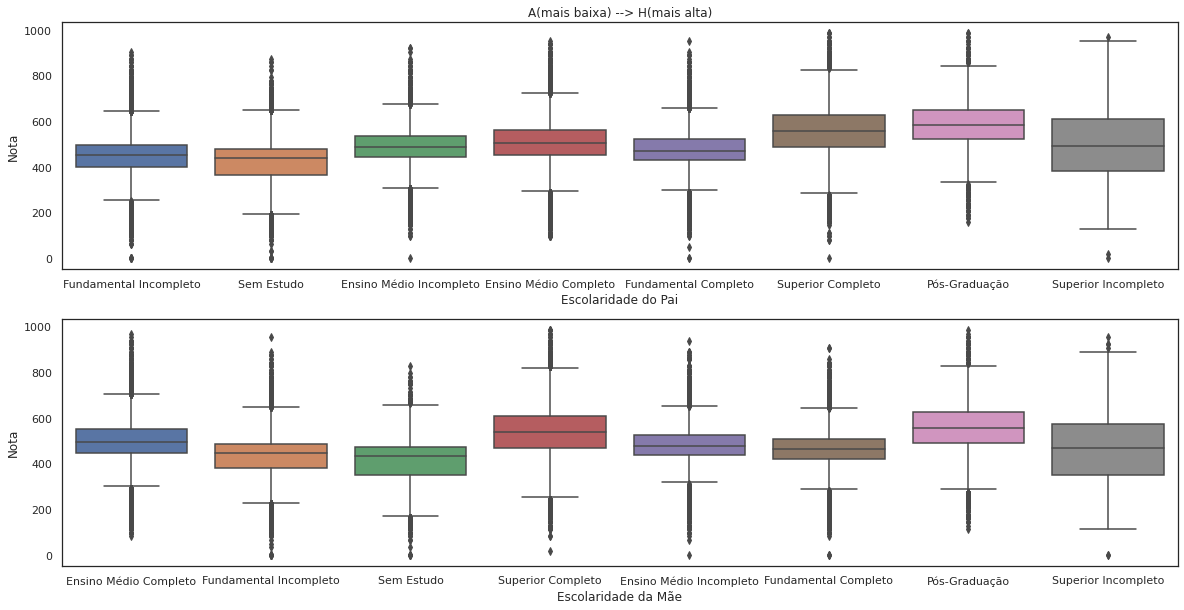

In [69]:
#@title
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 10))

sns.set(font_scale=1)

sns.boxplot(ax=ax1,x="Escolaridade_Pai", y="X_NOTA_OBJETIVA", data=dfEnem);
ax1.set(ylabel="Nota", xlabel="Escolaridade do Pai", title="A(mais baixa) --> H(mais alta)")
#handles, _ = ax1.get_legend_handles_labels()          # Get the artists.

sns.boxplot(ax=ax2, x="Escolaridade_Mae", y="X_NOTA_OBJETIVA", data=dfEnem);
ax2.set(ylabel="Nota", xlabel="Escolaridade da Mãe")


plt.show()

Muitos estudandes não sabem a escolaridade dos pais.
Entretanto, pela nota do enem, talvez seja possível estimar que os pais não sejam escolarizados.
Qual a origem dos pais? São de zona rural? qual a profissão?
Aprofundar mais tarde.

## *ACESSO A TECNOLOGIAS*




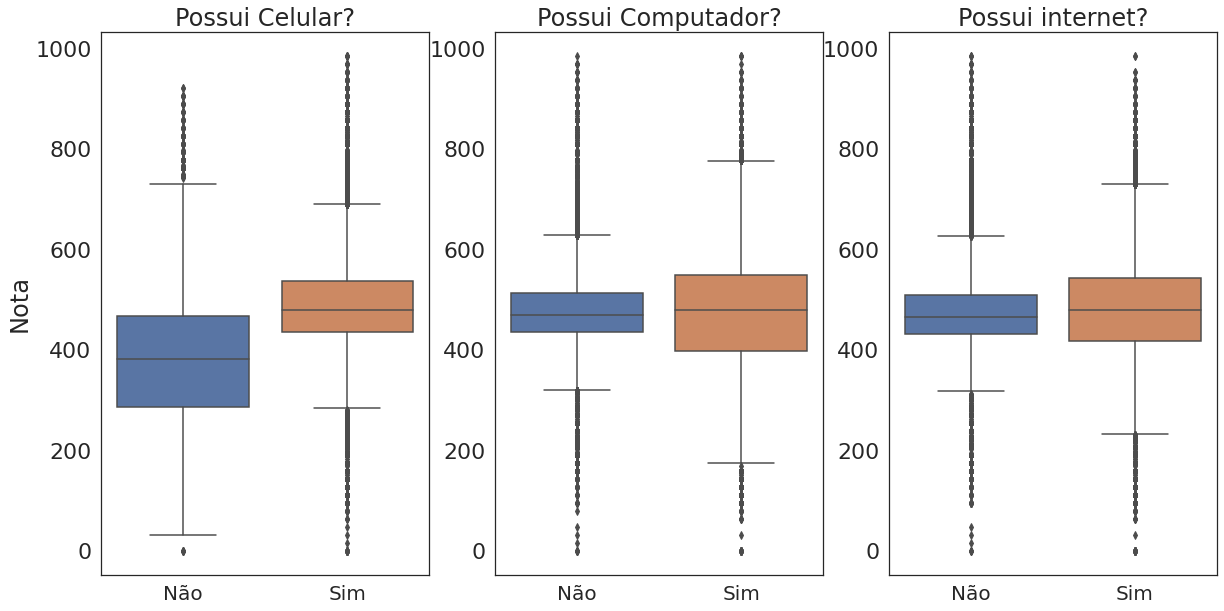

In [73]:
#@title
sns.set_style("white")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))

sns.set(font_scale=2)

sns.boxplot(ax=ax1,x="Celular", y="X_NOTA_OBJETIVA", data=dfEnem);
ax1.set(ylabel="Nota", xlabel="", title="Possui Celular?")
ax1.set_xticks([0,1]) 
ax1.set_xticklabels(['Não', "Sim"], fontsize=20)

sns.boxplot(ax=ax2,x="Computador", y="X_NOTA_OBJETIVA", data=dfEnem);
ax2.set(ylabel="", xlabel="", title="Possui Computador?")
ax2.set_xticklabels(['Não', "Sim"], fontsize=20)


sns.boxplot(ax=ax3,x="Internet", y="X_NOTA_OBJETIVA", data=dfEnem);
ax3.set(ylabel="", xlabel="", title="Possui internet?")
ax3.set_xticklabels(['Não', "Sim"], fontsize=20)


plt.show()